In [1]:
# Importing necessary libraries

from stoneforge.petrophysics.porosity import effective_porosity, density_porosity, neutron_porosity, neutron_density_porosity, sonic_porosity, gaymard_porosity
from stoneforge.petrophysics.shale_volume import vshale_larionov_old
from stoneforge.data_management.preprocessing import DataLoader
from stoneforge.vis import wellplot

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

In [2]:
# Accessing Internal Dataframe for ES1 Well

DATA = DataLoader(r"https://raw.githubusercontent.com/giecaruff/datasets/refs/heads/main/wells/las2/npra/ES1.las", filetype='las2')
data_ES1, units_ES1 = DATA.dataframe(DATA.data_obj.data)
data_ES1

,DEPT,SP,ILD,ILM,LL8,CALI,GR,DRHO,RHOB,NPHI,DT
0,92.0,-30.3926,3.0692,0.8266,2.8159,-999.0,-999.0000,-999.0000,-999.0000,-999.0000,-999.0
1,92.5,-30.2210,5.0267,1.0292,4.0912,-999.0,-999.0000,-999.0000,-999.0000,-999.0000,-999.0
2,93.0,-29.8822,2.8043,1.6126,5.9442,-999.0,-999.0000,-999.0000,-999.0000,-999.0000,-999.0
3,93.5,-29.6537,2.2313,2.2537,8.6365,-999.0,-999.0000,-999.0000,-999.0000,-999.0000,-999.0
4,94.0,-29.6109,3.2032,2.2094,12.0469,-999.0,-999.0000,-999.0000,-999.0000,-999.0000,-999.0
...,...,...,...,...,...,...,...,...,...,...,...
15290,7737.0,-999.0000,-999.0000,-999.0000,-999.0000,-999.0,89.3197,0.0414,2.5954,26.6569,-999.0
15291,7737.5,-999.0000,-999.0000,-999.0000,-999.0000,-999.0,89.2269,0.0212,2.5998,26.6423,-999.0
15292,7738.0,-999.0000,-999.0000,-999.0000,-999.0000,-999.0,88.8622,0.0109,2.6149,26.5081,-999.0
15293,7738.5,-999.0000,-999.0000,-999.0000,-999.0000,-999.0,-999.0000,-999.0000,-999.0000,-999.0000,-999.0


In [3]:
# Accessing Internal Dataframe units for ES1 Well

print(units_ES1)

{'DEPT': 'F', 'SP': 'MV', 'ILD': 'OHMM', 'ILM': 'OHMM', 'LL8': 'OHMM', 'CALI': 'IN', 'GR': 'GAPI', 'DRHO': 'G/C3', 'RHOB': 'G/C3', 'NPHI': '%', 'DT': 'US/F'}


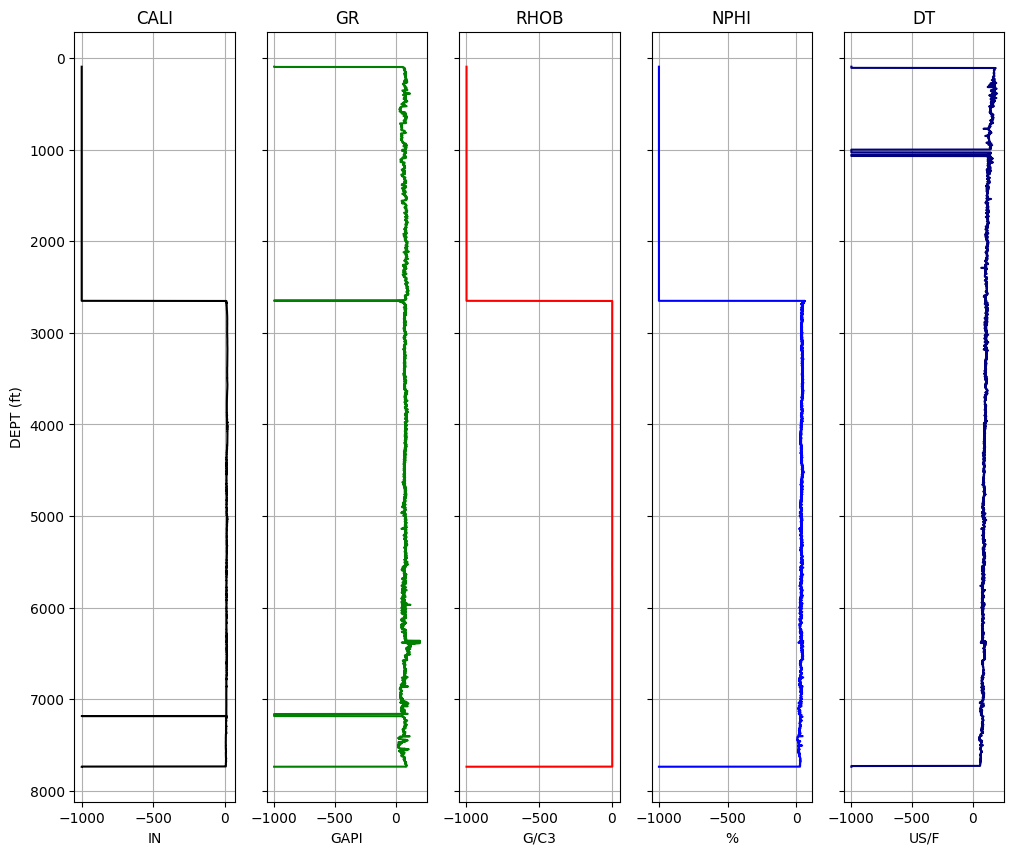

In [4]:
# Viewing Well Log Data

curves = ["CALI","GR","RHOB","NPHI","DT"]
units = []
for c in curves:
    units.append(units_ES1[c])

color = ["k","g","r","b","navy"]

wellplot(data_ES1,"DEPT",curves, color, units, d_unit='ft')

In [5]:
# Removing specific values
# OBS: you can use "df.dropna(inplace=True)" to remove all np.nan values

data_ES1_c = data_ES1[~data_ES1.isin([-999.0]).any(axis=1)]
data_ES1_c

,DEPT,SP,ILD,ILM,LL8,CALI,GR,DRHO,RHOB,NPHI,DT
5116,2650.0,-19.4757,6.6125,6.5755,8.6671,12.5540,34.8428,-0.2901,2.5141,59.9807,113.7847
5117,2650.5,-18.7602,6.5202,6.4486,8.5295,12.5575,35.0674,-0.2898,2.5044,54.9894,113.8231
5118,2651.0,-17.4933,6.4315,6.2702,8.5931,12.5610,36.0952,-0.2921,2.5165,55.7570,113.5050
5119,2651.5,-16.8992,6.3439,6.0968,8.7373,12.5645,36.6029,-0.2921,2.5142,54.7756,112.1081
5120,2652.0,-16.9710,6.2575,5.9635,8.8301,12.5680,37.4207,-0.2920,2.4873,56.2208,109.8578
...,...,...,...,...,...,...,...,...,...,...,...
15272,7728.0,-20.3430,23.0497,23.7826,26.3178,8.9532,89.7910,0.1685,2.6795,25.8501,60.4970
15273,7728.5,-19.4210,23.0163,23.9575,26.4261,8.8526,88.4607,0.1523,2.6594,25.9958,60.6145
15274,7729.0,-18.4918,22.9829,24.1176,26.4875,9.0668,87.7595,0.1682,2.6790,25.9690,60.7682
15275,7729.5,-17.5625,22.9496,24.0160,26.5491,9.3203,87.8607,0.1825,2.7043,25.7965,60.7674


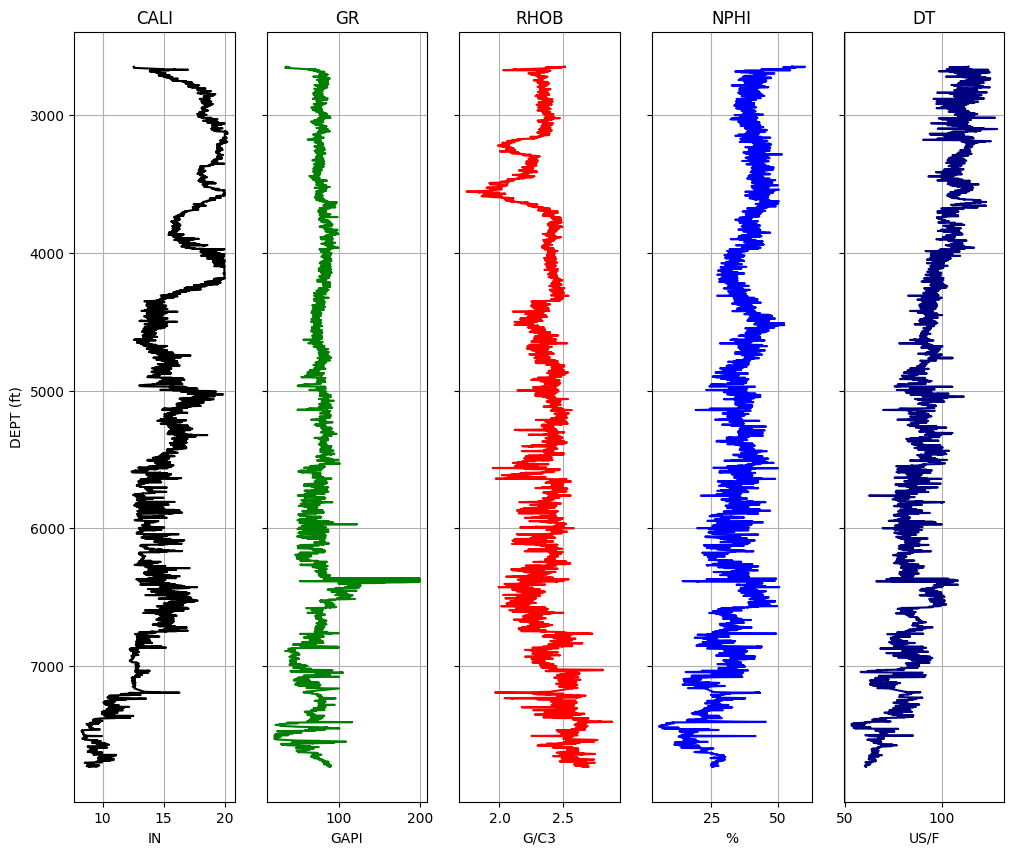

In [6]:
# Viewing Cleaned Well Log Data

wellplot(data_ES1_c,"DEPT",curves, color, units, d_unit='ft')

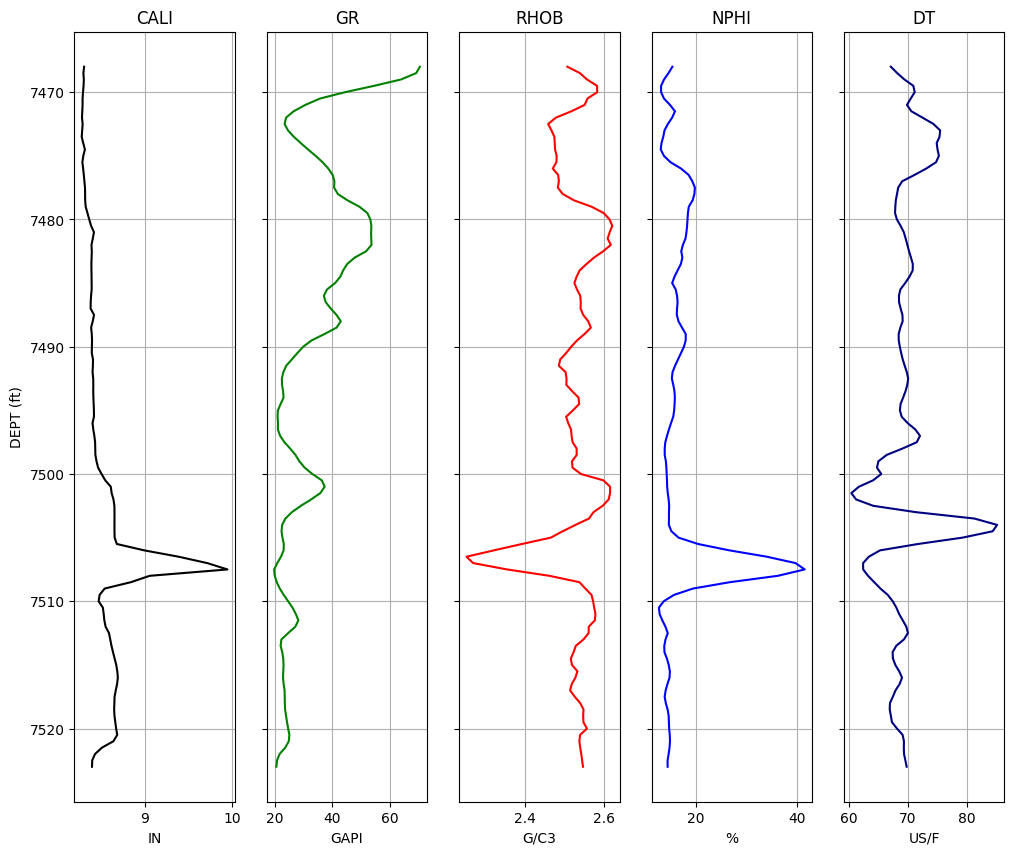

In [7]:
# Taking specific range in depth for analysis (ledge sandstone interval)

LEDGE_SANDSTONE = data_ES1_c[data_ES1_c['DEPT'].between(7468, 7523)]
wellplot(LEDGE_SANDSTONE,"DEPT",curves, color, units, d_unit='ft')

In [8]:
# VSH Calculations

GR = np.array(LEDGE_SANDSTONE["GR"])

GR_min = np.percentile(GR, 10)
GR_max = np.percentile(GR, 90)
print("GR_min:",GR_min,"|GR_max:",GR_max)

VSH = vshale_larionov_old(gr=GR,grmin=GR_min,grmax=GR_max)

GR_min: 21.6476 |GR_max: 49.479


In [9]:
# PHI Calculations

DT = np.array(LEDGE_SANDSTONE["DT"])

NPHI = np.array(LEDGE_SANDSTONE["NPHI"])/100.
RHOB = np.array(LEDGE_SANDSTONE["RHOB"])
 
PHID = density_porosity(rhob=RHOB)

PHI = {
    "DEPTH":LEDGE_SANDSTONE["DEPT"],
    "PHID":PHID,
    "PHIe":effective_porosity(phi=PHID, vsh=VSH),
    "PHIN":neutron_porosity(nphi=NPHI, vsh=VSH),
    "PHIND":neutron_density_porosity(phid=PHID, phin=NPHI),
    "PHIS":sonic_porosity(dt=DT),
    "PHI_gaymard":gaymard_porosity(phid=PHID, phin=NPHI),
}

LEDGE_SANDSTONE_PHI = pd.DataFrame(PHI)

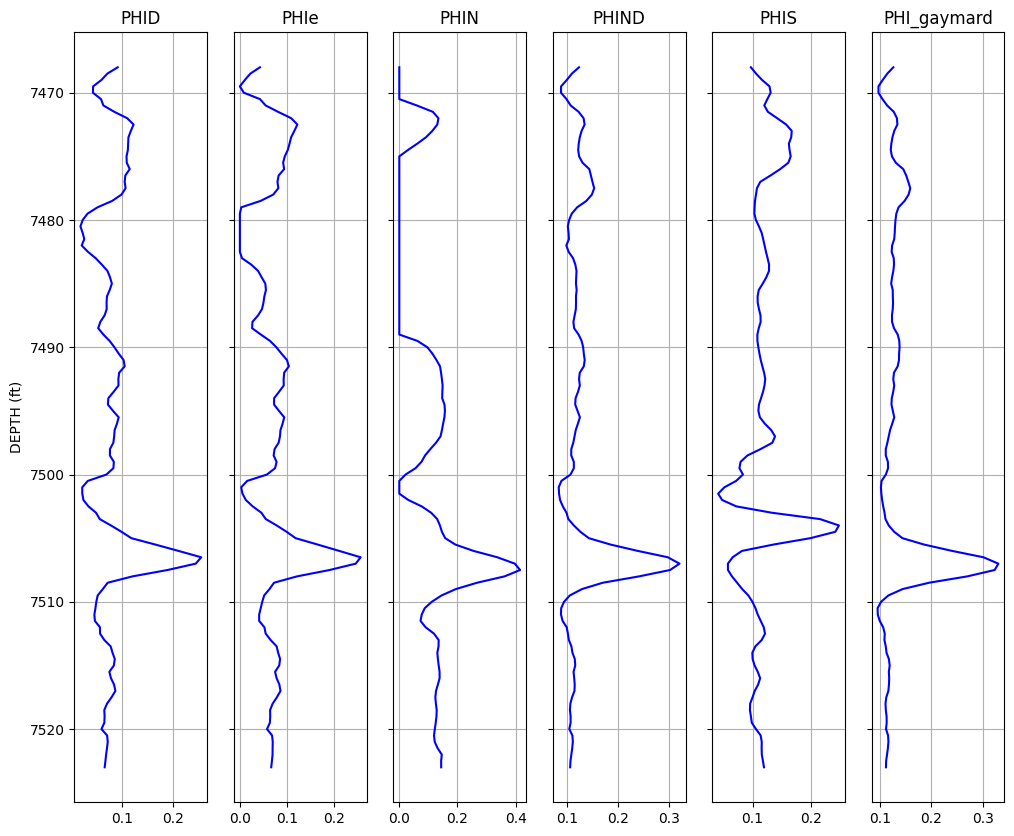

In [10]:
# Plotting PHI results

curves = ["PHID","PHIe","PHIN","PHIND","PHIS","PHI_gaymard"]
units = ["","","","","",""]
color = ["b","b","b","b","b","b"]

wellplot(LEDGE_SANDSTONE_PHI,"DEPTH",curves, color, units, d_unit='ft')